In [14]:
using resistance_evolution, CSV, DataFrames, CairoMakie

resistance_evolution.plotting_style.default_makie!()

In [6]:
df = CSV.read("growth_plate.csv", DataFrame)
df

,run,time_min,temp,OD600,OD600_norm,strain,well,media
,String3,Float64,Float64,Float64,Float64,String15,String3,String31
1,r1,6.16667,37.1,0.048,0.00341258,MG1655_1,A02,M9_0.5%_glucose_supp
2,r1,13.1667,37.1,0.049,0.00441258,MG1655_1,A02,M9_0.5%_glucose_supp
3,r1,20.1667,37.0,0.049,0.00441258,MG1655_1,A02,M9_0.5%_glucose_supp
4,r1,27.1667,37.1,0.05,0.00541258,MG1655_1,A02,M9_0.5%_glucose_supp
5,r1,34.1667,37.0,0.051,0.00641258,MG1655_1,A02,M9_0.5%_glucose_supp
6,r1,41.1667,37.0,0.052,0.00741258,MG1655_1,A02,M9_0.5%_glucose_supp
7,r1,48.1667,37.1,0.053,0.00841258,MG1655_1,A02,M9_0.5%_glucose_supp
8,r1,55.1667,37.0,0.054,0.00941258,MG1655_1,A02,M9_0.5%_glucose_supp
9,r1,62.1667,37.1,0.055,0.0104126,MG1655_1,A02,M9_0.5%_glucose_supp


In [7]:
df |> names

9-element Vector{String}:
 "run"
 "time_min"
 "temp"
 "OD600"
 "OD600_norm"
 "strain"
 "well"
 "media"
 "pos_selection"

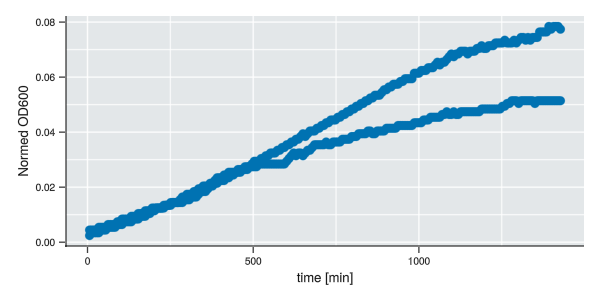

: 

In [28]:
df_mg1 = df[df.strain .== "MG1655_1", :]
insertcols!(df_mg1, 1, :tc => [parse(Float64, split(x, "_")[1]) for x in df_mg1.pos_selection])

tc = 1.0
x = df_mg1[df_mg1.tc .== tc, :time_min]
y = df_mg1[df_mg1.tc .== tc, :OD600_norm]

fig = Figure(resolution=(600, 300))
ax = Axis(fig[1, 1])
scatter!(ax, x, y)
ax.xlabel = "time [min]"
ax.ylabel = "Normed OD600"


fig

In [ ]:
fig = Figure(resolution=(600, 300), yscale=:)
ax = Axis(fig[1, 1])
scatter!(ax, x, y)
ax.xlabel = "time [min]"
ax.ylabel = "Normed OD600"



fig